# 第4回 リンク解析

この演習では，PageRankアルゴリズムの実装例を通して、アルゴリズムの理解を深めることおよび，既存のライブラリを用いてグラフの描画およびPageRankの計算ができることを目的とします．

この演習では以下のライブラリを使用します．
- [NetworkX](https://networkx.github.io/)
   - グラフの生成，分析，描画などグラフに対する各種操作のためのPythonライブラリ


In [1]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%precision 2

'%.2f'

## 1. PageRankアルゴリズムの実装

まずは，べき乗法によるPageRankの計算を実装します．

べき乗法に基づくPageRankアルゴリズムは以下のように記述できます． 

In [3]:
def pagerank(A, d = 0.85, eps = 1e-6):
    """
      A: 遷移確率行列
      d: damping factor
      eps: 誤差（eps以下になれば終了）
    """
    n = A.shape[0]  #ページ数n
    e = np.ones(A.shape[0]) #要素が1のn次元ベクトル
    p = e  / n #PageRankベクトルの初期化（初期状態分布）
    while True: # while Trueとしているが，実際には一定回数以上ループを繰り返すとアルゴリズムを終了するような設計がよい
        p_next = d * np.dot(A.T, p) + (1.0 - d) * e / n # PageRankベクトルの更新
        if lg.norm(p_next - p, ord=1) <= eps: #差のL1ノルムがeps以下になれば，終了
            p = p_next
            break
        p = p_next
    return p

では，上記のアルゴリズムを用いて，実際のグラフでPageRankを計算してみましょう．

簡単のため，以下のような3ノードの有向グラフ$G$を考えます．

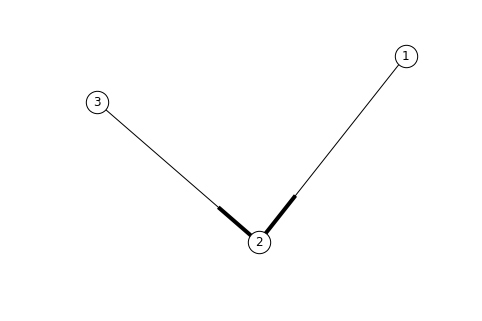

In [4]:
# 有向グラフの描画
G = nx.DiGraph()
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(3,2)])
pos = nx.spring_layout(G) # ばねモデルに基づくグラフのレイアウト
nx.draw(G, pos, with_labels=True, node_size=500, node_color="w")
plt.show()

このグラフ$G$に対応する遷移確率行列$A$は下記のように定義できます（「確率行列」となるよう，ページ2に対応する遷移確率の修正を行っている点に注意）．

In [5]:
A = np.array([
    [0, 1, 0],
    [1/3, 1/3, 1/3],
    [0, 1, 0]
])
A

array([[ 0.  ,  1.  ,  0.  ],
       [ 0.33,  0.33,  0.33],
       [ 0.  ,  1.  ,  0.  ]])

$d = 0.85$, $\epsilon = 10^{-6}$としたときのPageRankベクトル ${\mathbf p} = \{ p_1, p_2, p_3 \}$ は，以下のように求められます．

In [6]:
p = pagerank(A, d = 0.85, eps=1e-6)
p

array([ 0.21,  0.57,  0.21])

$p_1=0.21, p_2=0.57,  p_3=0.21$となり，多くの入リンクを持つページ$2$が高いPageRank値を持つであろうという直感と一致することがわかります．

## 2. NetworkXを用いたグラフの描画とPageRankの計算

Pythonのグラフ処理ライブラリであるNetworkXを使って，グラフの可視化およびPageRank値の計算を行う例を示します．ここでは，講義資料「リンク解析（１）」p12のグラフ例を用います．

In [7]:
G = nx.DiGraph() #有向グラフの生成
G.add_nodes_from([1,2,3,4,5,6]) #ノードの定義
G.add_edges_from([(1,2),(1,3), #エッジの定義 (1,2) は ノード1　から　ノード2　へ有向エッジがあることを意味
                  (2,1),(2,3),
                  (3,2),
                  (4,3),(4,5),
                  (6,4),(6,5)])

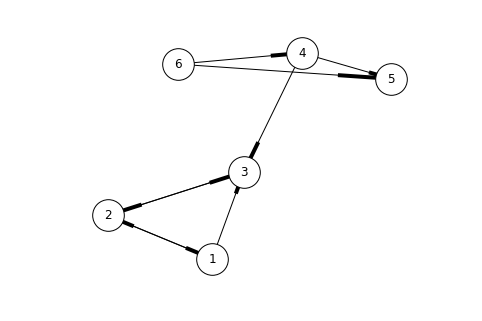

In [8]:
pos = nx.spring_layout(G)  #バネモデルでグラフをレイアウト
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="w")
plt.show()

さて，ノード5は出リンクを持たないため，全てのノードにエッジを張り，遷移確率行列を修正します．

In [9]:
G.add_edges_from([(5,1),(5,2),(5,3),(5,4),(5,5),(5,6)])

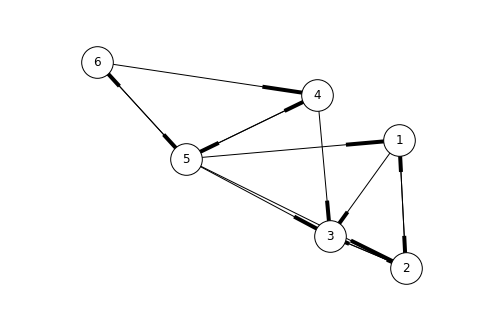

In [10]:
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="w")
plt.show()

では，このグラフに対してNetworkXの機能を用いてPageRankを計算します．NetworkXは各種グラフ解析アルゴリズムを提供しています．たとえば，PageRankやHITSなども実装されています．PageRankを求めるには，NetworkXのpagerank関数を用います．

In [20]:
p = nx.pagerank(G, alpha=0.85, tol=1e-6) # べき乗法によるpagerank計算． 引数 alpha はdamping factor, tol は eps　に対応
p

{1: 0.19, 2: 0.36, 3: 0.29, 4: 0.05, 5: 0.07, 6: 0.04}

NetworkXのpagerank関数は，これ以外にもいくつか種類が用意されています．

In [17]:
p = nx.pagerank_numpy(G,  alpha=0.85) # numpyの固有値計算ライブラリに基づくPageRank計算
p

{1: 0.19, 2: 0.36, 3: 0.29, 4: 0.05, 5: 0.07, 6: 0.04}

In [18]:
p = nx.pagerank_scipy(G, alpha=0.85) #scipyの疎行列を使ったべき乗法
p

{1: 0.19, 2: 0.36, 3: 0.29, 4: 0.05, 5: 0.07, 6: 0.04}

各種pagerank関数の詳細な仕様については，NetworkXの[pagerank](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)などを参照してください．Personalized PageRankも計算できます．

----
# 演習課題その3 リンク解析

## 必須課題（１）PageRankアルゴリズムの確認

講義資料「リンク解析（１）」p12のグラフに対して，遷移確率行列が確率行列の性質を満たすよう修正し，
べき乗法に基づくPageRankの計算を適用し，結果を報告せよ．ただし，$d = 0.85$とする．また，さまざまな初期状態分布に対してPageRank値を求めることで，異なる初期状態分布に対して同じPageRank値が得られることを確認せよ．

## 必須課題（２）定常分布

講義で述べたように，マルコフ連鎖が一意の定常分布 ${\mathbf \pi}$ を持つためには，そのマルコフ連鎖は既約かつ非周期的である必要がある．そこで，「既約ではあるが非周期的でないマルコフ連鎖」であるようなウェブグラフ$G$を用意し，$G$に対してテレポーテーションを用いない単純なPageRankアルゴリズム（すなわち，${\mathbf p} = A^{T}{\mathbf p}$）に基づくべき乗法を適用することで，初期状態分布によってはPageRankベクトルが収束しない場合があることを確認せよ．

- 用意したウェブグラフ$G$をNetworkXで可視化すること
- 用意したウェブグラフ$G$は，講義で使用した例とは異なる例を用いること

## 任意課題（１）Personalzied PageRank

Personalized (Biased) PageRankアルゴリズムを実装し， 必須課題（１）で用いたグラフに対して適用し，結果がどのように異なるか報告せよ．


## 任意課題（２） 実データに対するPageRank計算

ノード数が1万件を超えるような実グラフデータを各自で用意し，PageRankを求め結果を簡潔に報告せよ．
 - グラフの可視化を行うかどうかは自由
 - 極めて大規模なグラフに対してPageRankを求める場合は，NetworkXのpagerank_scipy関数等の使用を検討するとよい
 
## 任意課題（３） その他リンク解析アルゴリズムの実装

HITS，TextRank， あるいはVisualRankアルゴリズムを実装せよ．適宜データを用意し，実装したアルゴリズムをそのデータに適用し結果を報告せよ．

# 課題の提出方法

いずれかの方法で，ipython notebookのページ（.ipynbファイル）とそのhtml版を提出すること．

1. 添付ファイルで山本に送信．
   - 送付先 tyamamot at dl.kuis.kyoto-u.ac.jp
2. 各自のgithubやgithub gistにアップロードし，そのURLを山本に送信．この場合はhtml版を用意する必要はない．
3. 上記以外で，山本が実際に.ipynbファイルを確認できる方法．


# 締切

- 2017年1月31日（水）23:59
- 締切に関する個別の相談は``受け付けます``．